In [1]:
from PYME.IO.image import ImageStack
from detector20241211 import Detector as new_detector
from detector import Detector as old_detector
import matplotlib.pyplot as plt
from scipy import ndimage
# %matplotlib widget
# plt.set_loglevel("warning")
import numpy as np
import os
from PYME.recipes.processing import BackgroundSubtractionMovingPercentile
from PYME.IO.image import ImageStack
from PYME.localization.remFitBuf import fitTask
import scipy

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\e

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRITANIC.TTF', name='Britannic Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKI.TTF', name='Rockwell', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOS.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKBI.TTF', name='Rockwell', style='italic', variant='normal', weight=700, stretch='normal',

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNBI.TTF', name='Arial', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 7.8986363636363635
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BROADW.TTF', name='Broadway', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AGENCYR.TTF', name='Agency FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLECB.TTF', name='Gloucester MT Extra Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASDEMI.TTF', name='Eras Demi ITC', style='normal', variant='nor

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\pala.ttf', name='Palatino Linotype', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCEB.TTF', name='Tw Cen MT Condensed Extra Bold', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BELL.TTF', name='Bell MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERB____.TTF', name='Perpetua', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothL.ttc', name='Yu Gothic', style='normal', variant='normal', weight=3

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COPRGTB.TTF', name='Copperplate Gothic Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400,

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunsl.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MISTRAL.TTF', name='Mistral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taileb.ttf', name='Microsoft Tai Le', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsunb.ttf', name='SimSun-ExtB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbell.ttf', name='Corbel', style='normal', variant='normal', weight=300, stretch='

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoepr.ttf', name='Segoe Print', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothM.ttc', name='Yu Gothic', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRABK.TTF', name='Franklin Gothic Book', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CENSCBK.TTF', name='Century Schoolbook', style='normal', variant='normal', weight=400, st

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\times.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\JUICE___.TTF', name='Juice ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaB.ttc', name='Sitka Small', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyi.ttf', name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400, stretch='n

filename == E:\SARS_CoV_2_DH_Imaging\20241122\Z_Stack_3_Bead_Ref.h5
E:\SARS_CoV_2_DH_Imaging\analysis\20241122\Z_Stack_3_Bead_Ref.h5r


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuil.ttf', name='Segoe UI', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ntailub.ttf', name='Microsoft New Tai Lue', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\cambriai.ttf', name='Cambria', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucit.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuii.ttf', name='Segoe UI', style='italic', variant='normal', weight=400, st

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E7A710C8>
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf', name='cmmi10', style='normal', v

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\envs\\dhpymedev\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\ProgramData\\Miniconda3\\e

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRITANIC.TTF', name='Britannic Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsun.ttc', name='SimSun', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKI.TTF', name='Rockwell', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GOUDOS.TTF', name='Goudy Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ROCKBI.TTF', name='Rockwell', style='italic', variant='normal', weight=700, stretch='normal',

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNBI.TTF', name='Arial', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 7.8986363636363635
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BROADW.TTF', name='Broadway', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\AGENCYR.TTF', name='Agency FB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GLECB.TTF', name='Gloucester MT Extra Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ERASDEMI.TTF', name='Eras Demi ITC', style='normal', variant='nor

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\pala.ttf', name='Palatino Linotype', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCCEB.TTF', name='Tw Cen MT Condensed Extra Bold', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BELL.TTF', name='Bell MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PERB____.TTF', name='Perpetua', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothL.ttc', name='Yu Gothic', style='normal', variant='normal', weight=3

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbeli.ttf', name='Corbel', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\COPRGTB.TTF', name='Copperplate Gothic Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constan.ttf', name='Constantia', style='normal', variant='normal', weight=400,

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgunsl.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MISTRAL.TTF', name='Mistral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\taileb.ttf', name='Microsoft Tai Le', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\simsunb.ttf', name='SimSun-ExtB', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\corbell.ttf', name='Corbel', style='normal', variant='normal', weight=300, stretch='

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoepr.ttf', name='Segoe Print', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothM.ttc', name='Yu Gothic', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRABK.TTF', name='Franklin Gothic Book', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CENSCBK.TTF', name='Century Schoolbook', style='normal', variant='normal', weight=400, st

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\times.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\JUICE___.TTF', name='Juice ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SitkaB.ttc', name='Sitka Small', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\msyi.ttf', name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400, stretch='n

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucit.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\segoeuii.ttf', name='Segoe UI', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARABD.TTF', name='Garamond', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CENTAUR.TTF', name='Centaur', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_BLAI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=900, stretch='normal',

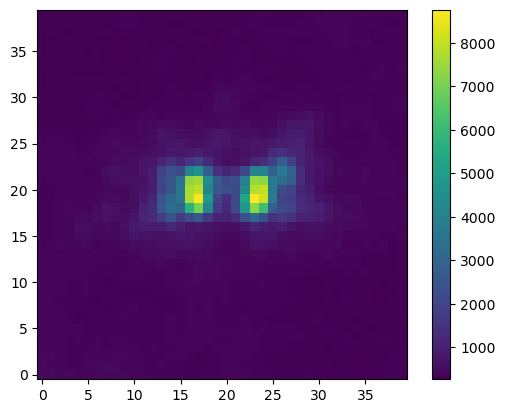

In [2]:
im = ImageStack(filename = "E:/SARS_CoV_2_DH_Imaging/20241122/Z_Stack_3_Bead_Ref.h5", haveGUI=False)
im.mdh['Camera.NoiseFactor'] = 1.4 # typical for EMCCD with gain > 10
im.mdh['Camera.ElectronsPerCount'] = 12.9  # e-/ADU
im.mdh['Camera.TrueEMGain'] = 272
im.mdh['Camera.ADOffset'] = 110 # [ADU]
im.mdh['voxelsize.x'] = 0.1175 # [um]
im.mdh['voxelsize.y'] = 0.1175 # [um]

dh_stack=np.squeeze(im.data_xytc[:,:,:,0]) 
dh = dh_stack[:,:,27]

plt.figure()
plt.imshow(dh, origin="lower")
plt.colorbar()
plt.show()

In [3]:
new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=3.63,pxSize=122.4)
old = old_detector(im.data_xytc.shape[:2], 10, mag=0.15)

In [5]:
roiHalfSize = 10 # [pixels]

xx = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]
yy = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]


X, Y = xx[:, None], yy[None, :]

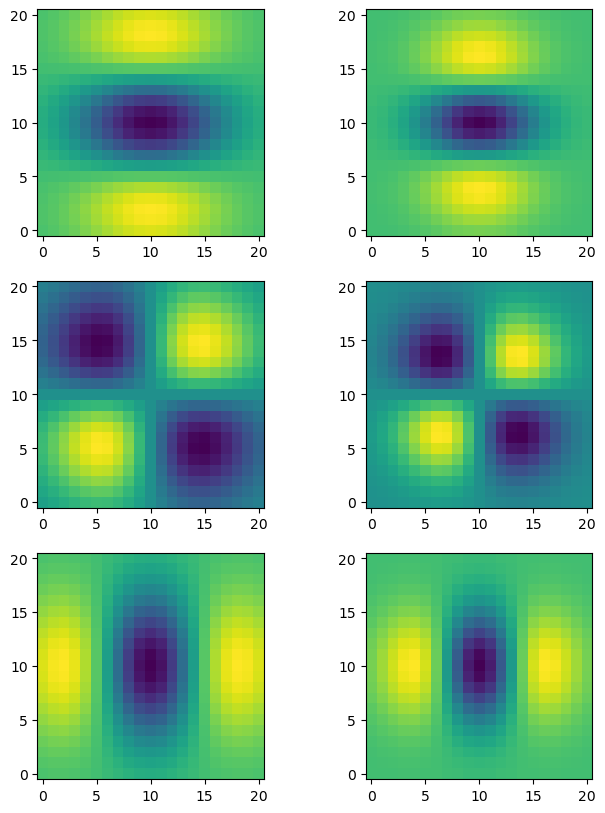

In [6]:
fig = plt.figure(figsize=(12, 10))
gspec = fig.add_gridspec(nrows=3, ncols=3)
ax1 = fig.add_subplot(gspec[0, 0])
ax2 = fig.add_subplot(gspec[1, 0])
ax3 = fig.add_subplot(gspec[2, 0])
ax4 = fig.add_subplot(gspec[0, 1])
ax5 = fig.add_subplot(gspec[1, 1])
ax6 = fig.add_subplot(gspec[2, 1])

ax1.imshow(old.g2a, origin="lower")
ax2.imshow(old.g2b, origin="lower")
ax3.imshow(old.g2c, origin="lower")

ax4.imshow(new.g2a, origin="lower")
ax5.imshow(new.g2b, origin="lower")
ax6.imshow(new.g2c, origin="lower")

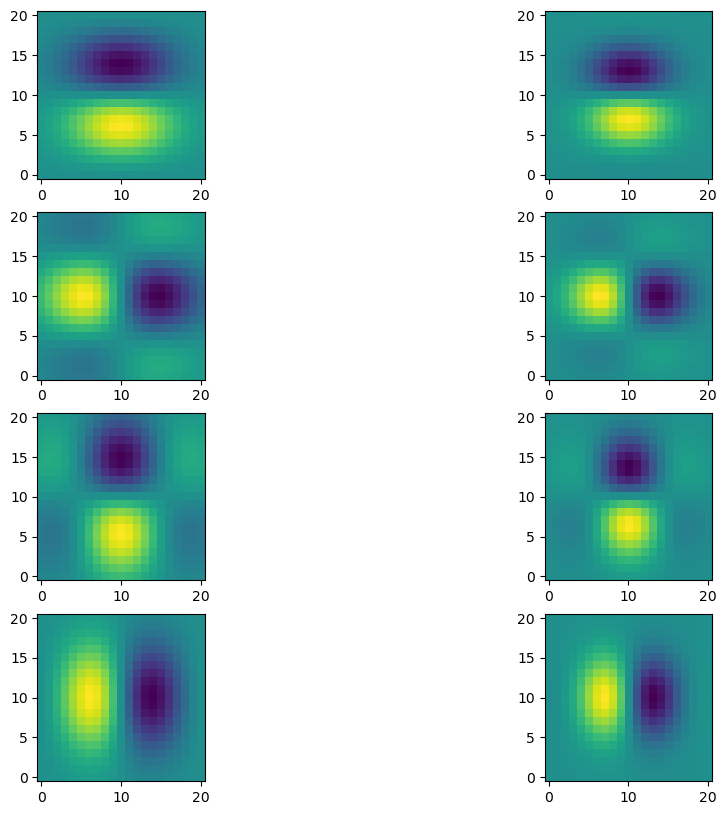

In [7]:
fig = plt.figure(figsize=(12, 10))
gspec = fig.add_gridspec(nrows=4, ncols=2)
ax1 = fig.add_subplot(gspec[0, 0])
ax2 = fig.add_subplot(gspec[1, 0])
ax3 = fig.add_subplot(gspec[2, 0])
ax4 = fig.add_subplot(gspec[3, 0])
ax5 = fig.add_subplot(gspec[0, 1])
ax6 = fig.add_subplot(gspec[1, 1])
ax7 = fig.add_subplot(gspec[2, 1])
ax8 = fig.add_subplot(gspec[3, 1])

ax1.imshow(old.h2a, origin="lower")
ax2.imshow(old.h2b, origin="lower")
ax3.imshow(old.h2c, origin="lower")
ax4.imshow(old.h2d, origin="lower")

ax5.imshow(new.h2a, origin="lower")
ax6.imshow(new.h2b, origin="lower")
ax7.imshow(new.h2c, origin="lower")
ax8.imshow(new.h2d, origin="lower")

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E8545A48>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E85DBD88>


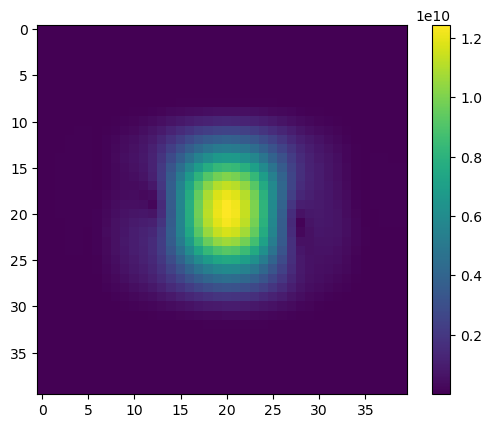

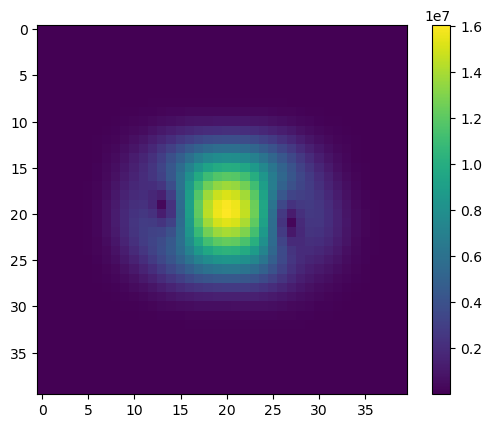

In [8]:
old_strength_image, old_angle_image = old.filter_frame(dh)

plt.figure()
plt.imshow(old_strength_image)
plt.colorbar()

new_strength_image, new_angle_image = new.filter_frame(dh)

plt.figure()
plt.imshow(new_strength_image)
plt.colorbar()

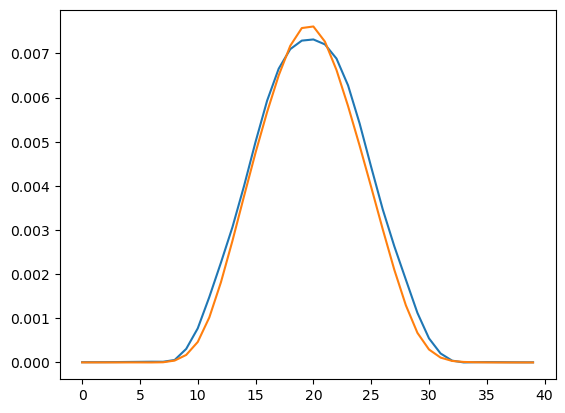

In [9]:
plt.figure()
plt.plot(range(0,40,1), old_strength_image[:,20]/np.sum(old_strength_image));
plt.plot(range(0,40,1), new_strength_image[:,20]/np.sum(new_strength_image));

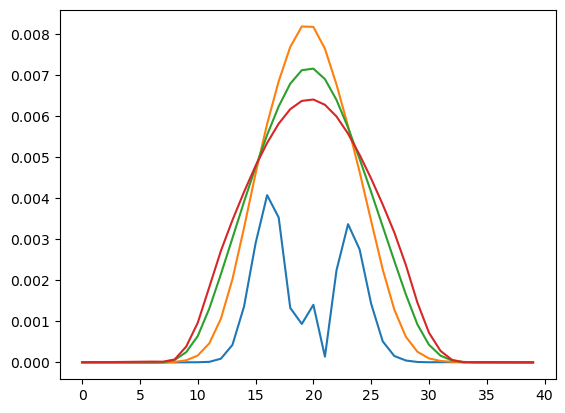

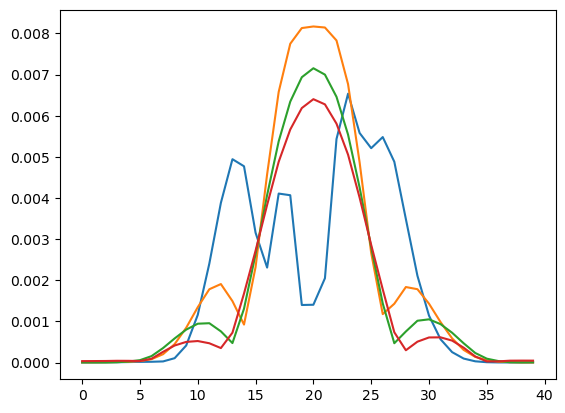

In [10]:
new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=2, pxSize=122.4)
new_strength_image_2, new_angle_image_2 = new.filter_frame(dh)

new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=3, pxSize=122.4)
new_strength_image_3, new_angle_image_3 = new.filter_frame(dh)

new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=4, pxSize=122.4)
new_strength_image_4, new_angle_image_4 = new.filter_frame(dh)

new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=5, pxSize=122.4)
new_strength_image_5, new_angle_image_5 = new.filter_frame(dh)

new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=7, pxSize=122.4)
new_strength_image_7, new_angle_image_7 = new.filter_frame(dh)

new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=9, pxSize=122.4)
new_strength_image_9, new_angle_image_9 = new.filter_frame(dh)

new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=12, pxSize=122.4)
new_strength_image_12, new_angle_image_12 = new.filter_frame(dh)

plt.figure()
plt.plot(range(0,40,1), new_strength_image_2[:,20]/np.sum(new_strength_image_2));
plt.plot(range(0,40,1), new_strength_image_3[:,20]/np.sum(new_strength_image_3));
plt.plot(range(0,40,1), new_strength_image_4[:,20]/np.sum(new_strength_image_4));
plt.plot(range(0,40,1), new_strength_image_5[:,20]/np.sum(new_strength_image_5));


plt.figure()
plt.plot(range(0,40,1), new_strength_image_2[20,:]/np.sum(new_strength_image_2));
plt.plot(range(0,40,1), new_strength_image_3[20,:]/np.sum(new_strength_image_3));
plt.plot(range(0,40,1), new_strength_image_4[20,:]/np.sum(new_strength_image_4));
plt.plot(range(0,40,1), new_strength_image_5[20,:]/np.sum(new_strength_image_5));

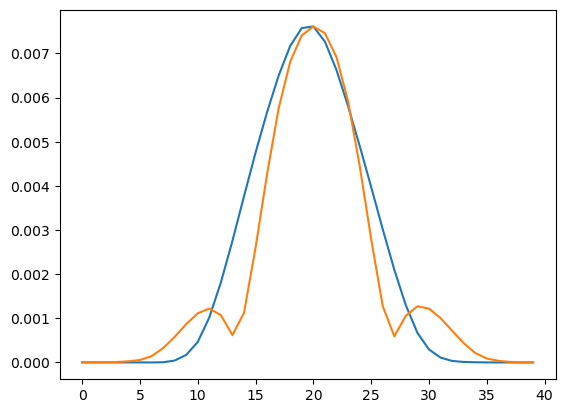

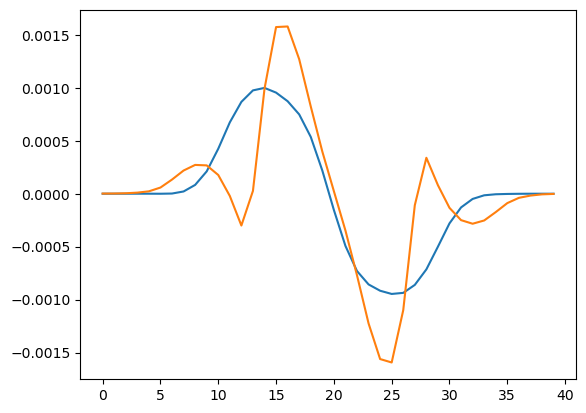

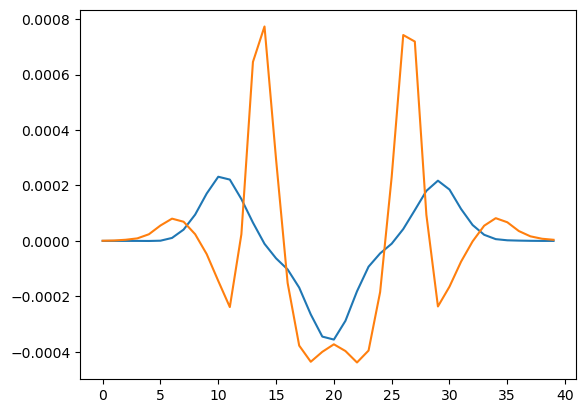

In [11]:
new = new_detector(roi_half_size=10, l_initial=854, lobe_sigma_initial=186, filter_sigma=3.63, pxSize=122.4)
new_strength_image, new_angle_image = new.filter_frame(dh)

plt.figure()
plt.plot(range(0,40,1), new_strength_image[:,20]/np.sum(new_strength_image));
plt.plot(range(0,40,1), new_strength_image[20,:]/np.sum(new_strength_image));

plt.figure()
plt.plot(range(0,40,1), np.gradient(new_strength_image[:,20]/np.sum(new_strength_image)));
plt.plot(range(0,40,1), np.gradient(new_strength_image[20,:]/np.sum(new_strength_image)));

plt.figure()
plt.plot(range(0,40,1), np.gradient(np.gradient(new_strength_image[:,20]/np.sum(new_strength_image))));
plt.plot(range(0,40,1), np.gradient(np.gradient(new_strength_image[20,:]/np.sum(new_strength_image))));

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E99AEDC8>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E9A4A648>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E9B21D88>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E7EB6188>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E98C5E48>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E9880908>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000223E86CC208>


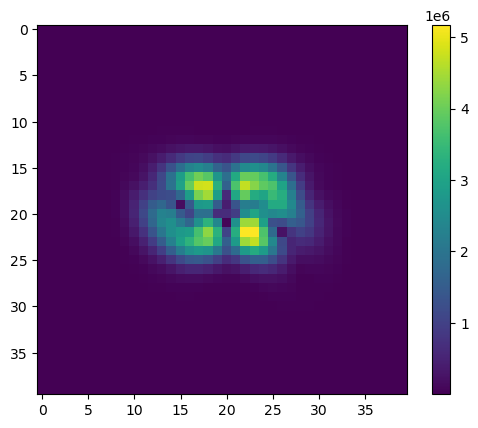

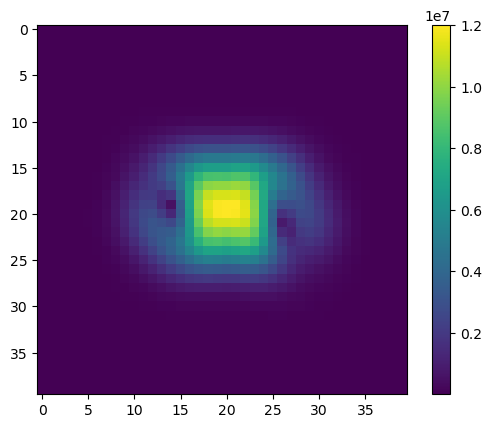

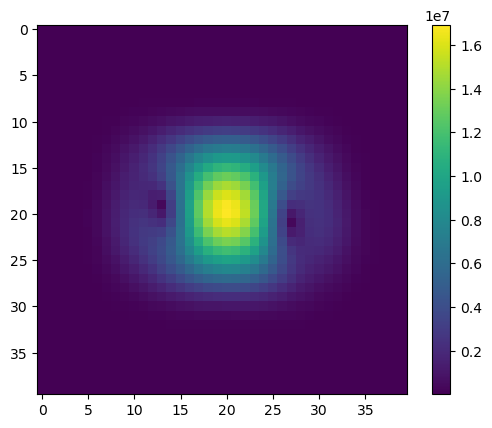

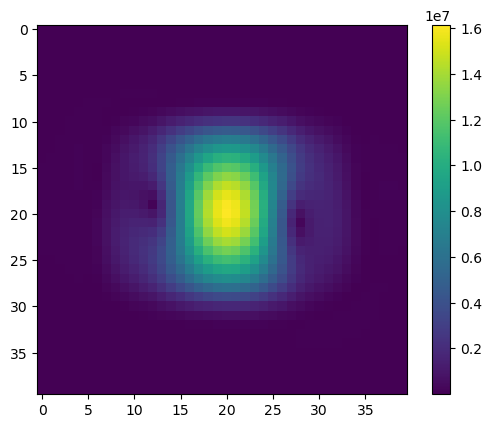

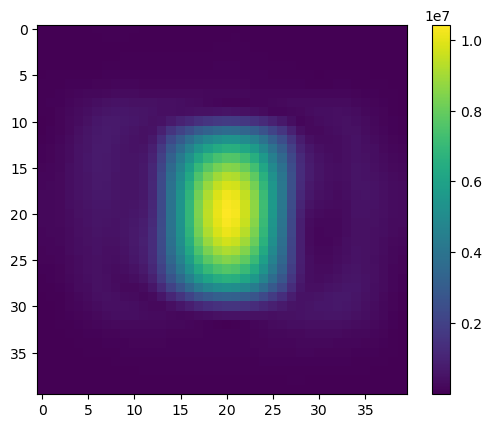

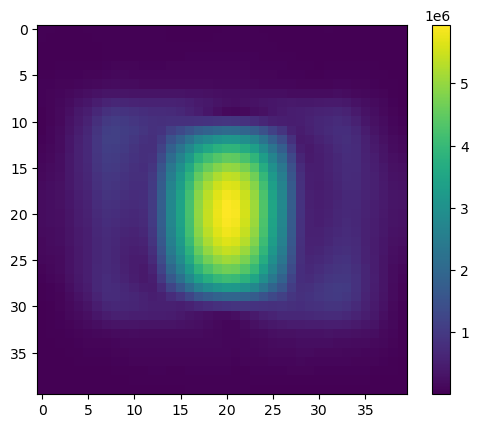

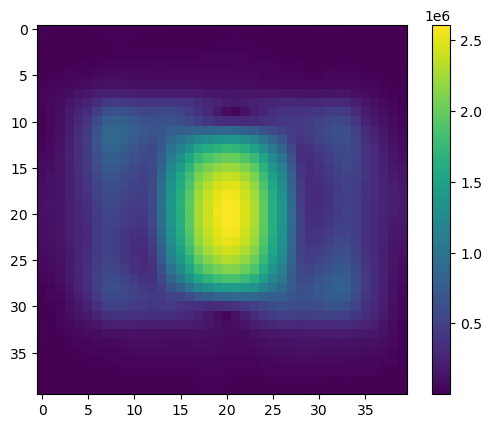

In [12]:
plt.figure()
plt.imshow(new_strength_image_2)
plt.colorbar()

plt.figure()
plt.imshow(new_strength_image_3)
plt.colorbar()

plt.figure()
plt.imshow(new_strength_image_4)
plt.colorbar()

plt.figure()
plt.imshow(new_strength_image_5)
plt.colorbar()

plt.figure()
plt.imshow(new_strength_image_7)
plt.colorbar()

plt.figure()
plt.imshow(new_strength_image_9)
plt.colorbar()

plt.figure()
plt.imshow(new_strength_image_12)
plt.colorbar()